
# 迁移学习基本概念

Transfer Learning

## 预训练模型的使用　AlexNet


### 预训练模型（Pre-trained Model）

[多伦多大学参考](https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w03/convnet.html)

预训练模型（Pre-trained Model）是指已经在一个大型数据集上训练过的模型，这个模型可以直接用于新的任务，或者作为迁移学习的起点。预训练模型通常用于深度学习领域，尤其是在计算资源有限或标注数据不足的情况下，使用预训练模型可以显著提高模型性能和学习效率。

预训练模型的关键特点和优势包括：

1. 大规模数据训练：预训练模型通常在大型数据集上训练，如ImageNet、COCO、WikiText等，这些数据集包含了丰富的特征和信息。通过这种方式训练的模型能够学习到广泛的特征表示。

2. 节省时间和资源：从头开始训练一个深度学习模型可能需要大量的计算资源和时间。使用预训练模型可以避免这种开销，因为你可以重用已经学习到的特征表示。

3. 提高性能：在许多任务中，从预训练模型开始并对其进行微调（调整模型的参数以适应新任务）通常会比从头开始训练模型获得更好的性能。

迁移学习和特征提取：预训练模型是迁移学习和特征提取的基础。在迁移学习中，预训练模型的知识（参数、权重）被迁移到新的任务上，有时只需调整最后几层以适应新任务。而在特征提取中，预训练模型的前几层（已经学习到通用特征的部分）被用来为新任务提取特征。

预训练模型在图像处理、自然语言处理、语音识别等领域都有广泛的应用。例如，图像识别领域的AlexNet、VGG、ResNet；自然语言处理领域的BERT、GPT；以及语音识别领域的WaveNet等。通过使用这些预训练模型，研究人员和开发者可以在各自的任务上取得显著进展，即使在数据有限的情况下。

----

所谓迁移学习，就是使用在大规模数据集上训练好的模型来解决小数据集问题。这种在大规模数据集上训练好的模型一般称为预训练模型或预训练网络。

预训练网络是一个保存好的网络，之前已在大型数据集（通常是大规模图像分类任务，如ImageNet）上训练好。

如果这个原始数据集足够大且足够通用，那么预训练网络学习到的特征的空间层次结构可以有效地作为视觉世界的通用特征。

因此这些特征可用于各种不同的计算机视觉问题，即使这些新问题涉及的类别和原始任务完全不同。

也就是说，只要大规模图片数据集足够庞大，预训练模型就可以看作一个通用的、有效的特征提取器；对于输入的图片，

预训练模型能够有效地提取图片的特征，而且提取的特征在不同问题之间具有可移植性，这是深度学习与许多早期浅层学习方法相比的重要优势，它使得深度学习对小数据集问题非常有效。

使用预训练网络创建新的模型的方法叫作迁移学习。

迁移学习的思路是利用预训练模型的卷积部分（也叫作卷积基）提取数据集的图片特征，然后重新训练最后的全连接部分（也叫作分类器）。

在这个特征提取过程中，要确保预训练模型的特征提取部分（也就是卷积基的参数）不能发生变化。迁移学习的思路有以下3步。


(1)冻结预训练模型的卷积基。

(2)根据具体问题重新设置分类器。


----

在此分别使用AlexNet与vgg16两个模型
AlexNet is the typciall deep CNN network, from it we can learn the strucutre of cnn.

1. alexnet is inculded in pytorch and is a pre-trained network, which means researchers often release both the architecture and the weights of the networks they train.
2. alexnet compsed two parts: (1) features;(2)classifier 

---

AlexNnet是Cnn经典模型，并已经保存在torchvision.models模型中，属于预训练模型，并可以通过调用查看相关模型参数



AlexNet和VGG16是两个在深度学习和计算机视觉领域具有里程碑意义的卷积神经网络（CNN）架构。

它们在图像识别任务上取得了显著的成绩，特别是在ImageNet挑战中。下面是对这两种网络的主要特点和区别的对比：

 


* AlexNet

发布年份：2012年，由Alex Krizhevsky、Ilya Sutskever和Geoffrey Hinton共同提出。

 > 架构特点：

  * 包含5个卷积层，后接3个全连接层。
  * 使用ReLU（Rectified Linear Unit）作为激活函数，这是首次在CNN中广泛采用ReLU来加速训练。
  * 引入了局部响应归一化（Local Response Normalization, LRN），尽管后来的研究表明LRN的效果可能不如预期。
  * 使用了最大池化（Max Pooling）。使用了丢弃法（Dropout）来减少全连接层的过拟合。

 > 参数数量：约6000万个。

 > 影响：AlexNet的成功在于它证明了深度学习尤其是深度卷积网络在大规模视觉识别任务中的有效性，从而开启了深度学习在计算机视觉领域的广泛应用。

---

* VGG16
发布年份：2014年，由Karen Simonyan和Andrew Zisserman提出。

> 架构特点：

包含13个卷积层和3个全连接层，共16层有权重的层，因此得名VGG16。

  * 所有卷积层使用了相同的小卷积核尺寸（3×3 3×3），步长为1，padding为1；池化层使用的是2×2最大池化，步长为2。
  * 仅使用ReLU激活函数，不使用LRN。
  * 架构非常规整，层与层之间通过重复堆叠相同大小的卷积核来加深网络深度。
  > 参数数量：约1.38亿个，比AlexNet多。
  > 影响：VGG16的贡献在于它展示了通过增加网络深度可以提升性能，并且它的统一架构简化了深度网络的设计过程。VGG16及其变体（如VGG19）常被用作迁移学习和特征提取的基础模型。
  主要区别

深度：VGG16更深，有16个有权重的层，而AlexNet有8层。

参数数量：VGG16有更多的参数，这使得它在存储和计算上更加昂贵。

架构规整性：VGG16的架构更加规整，所有卷积层均使用3×3卷积核；而AlexNet的架构相对复杂一些，卷积核尺寸和层结构更加多样化。

创新点：AlexNet首次在CNN中引入了ReLU激活函数和Dropout技术，VGG16则通过简化网络架构和加深网络深度来提升性能。

尽管AlexNet和VGG16都已不是最先进的模型，但它们在深度学习历史上的地位仍然非常重要，为后续的网络架构发展奠定了基础。

In [9]:
import torchvision.models# 包含了pytorch 中视觉相关预训练模型

#如果没有设置参数pretrained为True，表示仅加载VGG16模型架构，而不加载其预训练的权重
alexNet = torchvision.models.alexnet(pretrained=True)
vgg16=torchvision.models.vgg16(pretrained=True)
print("the model of alexNet \n")
alexNet
print("****************************************************************")
print("the model of VGG16 \n")
#vgg16

c:\Users\tom\.conda\envs\luck\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tom\.conda\envs\luck\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\tom\.conda\envs\luck\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most

the model of alexNet 

****************************************************************
the model of VGG16 



Notice that the AlexNet model is split into two parts. There is a component that computes "features" using convolutions.

The first network can be used independently of the second. Specifically, it can be used to compute a set of features that can be used later on. This idea of using neural network activation features to represent images is an extremely important one, so it is important to understand the idea now.

The set of numbers in features is another way of representing our image x. Recall that our initial image x was also represented as a tensor, also a set of numbers representing pixel intensity. Geometrically speaking, we are using points in a high-dimensional space to represent the images. In our pixel representation, the axes in this high-dimensional space were different pixels. In our features representation, the axes are not as easily interpretable.
 

But we will want to work with the features representation, because this representation makes classification easier. This representation organizes images in a more "useful" and "semantic" way than pixels.
但是我们需要使用表示，因为这种 features 表示使分类更容易。这种表示以比像素更“有用”和“语义”的方式组织图像。

Let me be more specific: this set of features was trained on image classification. 
<font color='r'>It turns out that these features can be useful for performing other image-related tasks as well!</font> That is, if we want to perform an image classification task of our own (for example, classifying cancer biopsies, which is nothing like what AlexNet was trained to do), we might compute these AlexNet features, and then train a small model on top of those features. We replace the classifier portion of AlexNet, but keep its features portion intact.
让我更具体地说：这组 features 是针对图像分类进行训练的。事实证明，这些功能对于执行其他与图像相关的任务也很有用！也就是说，如果我们想执行自己的图像分类任务（例如，对癌症活检进行分类，这与 AlexNet 的训练完全不同），我们可以计算这些 AlexNet 特征，然后在这些特征之上训练一个小模型。我们替换 classifier AlexNet 的部分，但保持其 features 部分不变。

 


the module is composed by two parts: fatures,which inclused 5 CNN layers and relu,maxpools, and the pattern in

Conn->Relu->maxpool

---
Notice that the AlexNet model is split into two parts. There is a component that computes "features" using convolutions.
 
---
 
in Maxpool there are two parameters:
当ceil_mode = true时，将保存不足为kernel_size大小的数据保存，自动补足NAN至kernel_size大小；
当ceil_mode = False时，剩余数据不足kernel_size大小时，直接舍弃。

In [8]:
# alexnet与vgg模型的不同部分
alexnet_feature=alexNet.features
print("The feature part of alexnt")
print(alexnet_feature)
vgg16_feature=vgg16.features
print("The feature part of vgg16")
#print(vgg16_feature)

The feature part of alexnt
Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)
The feature part of vgg16


为了使用预训练模型，首先观察预训练模型的结构，可以通过论文来得到，或者文档解读

例如
vgg16与alexNet的结构类似,可以分为feature，avgpool，classifer 三个序列

feature序列实现conv，maxpool的处理，avgpool实现flatten，为加载如linear做准备，classifer包含linear实现最终的分类

例如alexnet要求输入图片大小为224*224 

其中对输入图片尺寸有裁剪要求，不但需要使用resize，还要使用centercorp
在PyTorch的transforms.Compose中使用的transforms.CenterCrop(224)操作的作用是从图像的中心裁剪出一个大小为224x224像素的正方形区域。这是图像预处理的一部分，通常用于确保网络接收到的所有输入图像具有统一的尺寸。

这个操作对于使用预训练模型特别重要，因为这些模型（如AlexNet、VGG、ResNet等）在训练时通常期望输入图像具有特定的尺寸。例如，很多经典的CNN模型都是在224x224的输入图像上训练的。因此，使用transforms.CenterCrop(224)确保输入图像与训练时使用的图像尺寸相匹配，这是利用预训练模型进行迁移学习时的一个常见步骤。

具体步骤如下：

1.transforms.Resize(256)：首先将图像缩放到256x256。这个步骤通常是为了确保图像足够大，可以从中裁剪出224x224的区域。缩放到稍大于目标裁剪尺寸的大小可以保持图像的一定信息量。

2. transforms.CenterCrop(224)：然后从缩放后的图像中心裁剪出224x224的区域。这样做是基于假设，图像中心通常包含了图像的主要内容。

3. transforms.ToTensor()：将PIL图像或NumPy ndarray转换为torch.Tensor。这一步是必要的，因为PyTorch模型期望的输入是Tensor格式。

4. transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])：最后，使用指定的均值和标准差对每个通道进行归一化。这些特定的均值和标准差是基于ImageNet数据集计算得出的，用于匹配预训练模型的预处理步骤。

总的来说，transforms.CenterCrop(224)在确保所有输入图像具有一致尺寸的同时，试图保留图像中心的重要内容，这对于训练和推理都是非常重要的。

### 冻结feature中基，不参与训练
为了使用迁移学习，首先需要冻结模型卷积基，即模型的卷积部分是不会参与训练的，model.features返回模型卷积部分。

对这部分的参数，可以设置其requires_grad属性为False，这样，这部分网络参数就不再计算梯度参与训练了。

model.features返回模型卷积部分。对这部分的参数，可以设置其requires_grad属性为False，这样，这部分网络参数就不再计算梯度参与训练了。

如果卷积部分的参数不冻结，在训练刚开始，由于分类器部分的参数是随机的，这会给整个网络带来巨大的梯度震荡，破坏已经训练好的卷积部分的参数，使得卷积基特征提取能力大大下降。

如何设置requires_grad为False？
对于使用PyTorch的情况，你可以通过遍历模型的参数并设置requires_grad属性来冻结模型的某些部分。以下是一个例子，展示了如何冻结预训练模型的特征提取部分（卷积层）：
```python 
 假设 model 是你加载的预训练模型
for param in model.features.parameters():
    param.requires_grad = False
```

将模型的某些部分的requires_grad属性设置为False是一种常见的迁移学习和模型微调策略。这种做法允许你冻结模型的一部分（通常是预训练的部分），以避免在训练过程中更新这些部分的参数，同时只对模型的剩余部分（通常是新添加的层）进行训练。

何时需要这样做？

迁移学习时：当你在一个相对较小的数据集上进行迁移学习时，冻结预训练模型的卷积基（即特征提取层）可以防止过拟合。

<font color='red'>这是因为预训练的特征已经足够丰富，能够捕捉到从一般到特定的特征，而只需在这些特征的基础上学习新任务的特定决策边界。</font>

计算资源有限时：计算梯度和执行反向传播是训练过程中计算成本最高的部分之一。冻结模型的一部分可以显著减少内存消耗和计算时间，使得训练更快，尤其是当你的硬件资源有限时。



the current device is  cuda


c:\Users\tom\.conda\envs\luck\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tom\.conda\envs\luck\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


the strusture of classifier of alex Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
the index of species is {0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}
数据长度 1122
the size of the whole dataset is 1122, train size is 897 and test size is 225
################################Current Epoch is 1#################################
Epoch 1, the mean of this epoch train loss is :  0.318836722507452
Epoch 1, the mean train ac of this epoch c is :  90.4967320261438%
----------------------------------------------------------------
Epoch 1, the mean test loss of this epoch is : 0.2504065525390615
Epoch 1, the mean test acc of this epoch is : 95.41666666666667%
*************************************************************

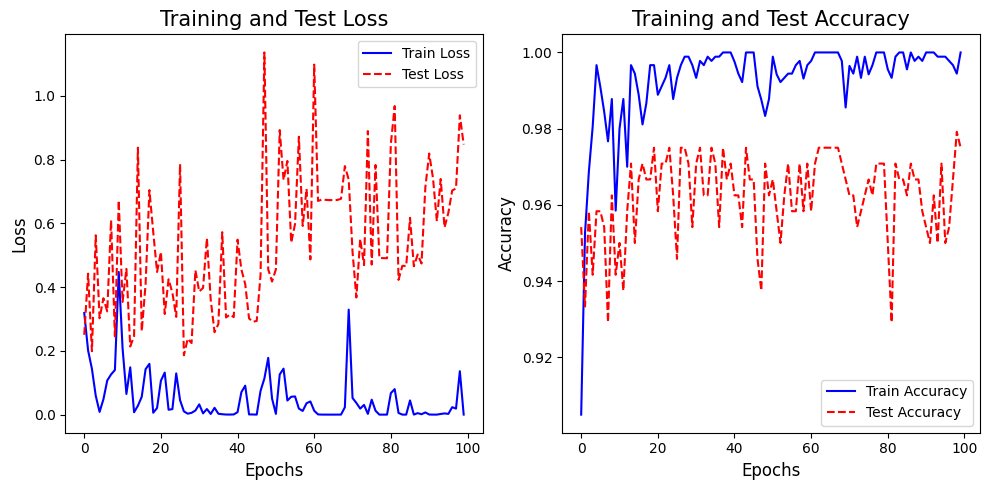

my model state_dic: <bound method Module.state_dict of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): L

In [19]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import glob
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def myfig(train_loss, test_loss, train_acc, test_acc):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # 创建一个图形，其中包含1行2列的子图
    
    # 绘制损失子图
    axes[0].plot(train_loss, 'blue', label='Train Loss')
    axes[0].plot(test_loss, 'red', linestyle='--',label='Test Loss')
    axes[0].set_title('Training and Test Loss', fontsize=15)
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].legend(loc='best')
    
    # 绘制准确率子图
    axes[1].plot(train_acc, 'blue', label='Train Accuracy')
    axes[1].plot(test_acc, 'red',linestyle='--', label='Test Accuracy')
    axes[1].set_title('Training and Test Accuracy', fontsize=15)
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].legend(loc='best')
    
    plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
    plt.show()
# 自定义数据集
class MyDataset(Dataset):
    def __init__(self, filepath, labels, transform=None):
        self.filepath = filepath
        self.labels = labels
        self.transform = transform

    def __getitem__(self, idx):
        img_path = self.filepath[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.labels)

if __name__=='__main__':
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("the current device is ",device)
    #调入，实例化预训练模型    
    pre_model=alexNet = torchvision.models.alexnet(pretrained=True)
    #修改预训练模型，classifer序列中的最后一层（liner）使得其分类数目与实验相同 ,本例是4个类别
    print('the strusture of classifier of alex',pre_model.classifier)
    pre_model.classifier[-1]=nn.Linear(in_features=alex_model.classifier[-1].in_features, out_features=4)

    for param in pre_model.features.parameters():
        param.requires_grad = False
    pre_model.to(device)



    #alexnet 的输入 size是256*256
    pre_transform = transforms.Compose([
        transforms.Resize(256),  # 将图像缩放为256x256
        transforms.CenterCrop(224),  # 从中心裁剪出224x224的图像
        transforms.ToTensor(),  # 将图像转换为PyTorch张量
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  #此处归一化
    ])
    
    file_path=r'C:\data\deepl\weather\*.jpg'
    file_name=glob.glob(file_path)#获得目录下所有jpg文件文件名称，顺序与之后读取顺序相同
    #创建4中天气的label
    species = ['cloudy', 'rain', 'shine', 'sunrise']
    # 将天气list转化为dict
    species_2_idx=dict((i,c) for i,c in enumerate(species))
    print(f"the index of species is {species_2_idx}")
    labels=[]# 创建list保存标签对应的int index
    labels_name=[]#创建list保存标签对应的 name
    for img in file_name:
        for i, c in enumerate(species):
            if c in img:#这里直接判断是否文件名称包含了相应的label文字
                labels.append(i)
                labels_name.append(c)
    mydata=MyDataset(filepath=file_name,labels=labels,transform=pre_transform)
    data_size=len(mydata)
    print("数据长度",data_size)
    #通过randon_split 实现train，test划分
    train_size=int(0.8*data_size)
    test_size=data_size-train_size
    train_data,test_data=random_split(mydata,[train_size,test_size])
    print(f"the size of the whole dataset is {data_size}, train size is {train_size} and test size is {test_size}")
    # 分别实现trainloader， testloade
    train_loader=DataLoader(train_data,shuffle=True,batch_size=20)
    test_loader=DataLoader(test_data,shuffle=True,batch_size=20)
# 模型训练开始
    #mycnn = MyCnn(input_channel=3,output=4).to(device)注意在此由于使用预预训练模型，故不用自己创建模型实例

    optimizer = optim.Adam(pre_model.parameters(), lr=0.0005)
    loss_fn = nn.CrossEntropyLoss()
    epochs=100
    # 训练循环
  
    train_loss_list = []
    test_loss_list=[]
    train_acc_list = []
    test_acc_list=[]
    #checkpoint路径#
    PATH='saved_model/checkpoint/weather_model_checkpoint_{}.pt'
    # 记录best acc，保存最优参数
    #best_loss = float('inf') 如果是基于loss那么就是loss初始设为无穷大
    best_acc=0
    best_epoch = 0# 最优周期

    BEST_PATH='saved_model/checkpoint/weather_best_checkpoint.pt'
    for epoch in range(epochs):
        train_epoch_loss=[]
        train_epoch_acc=[]
        pre_model.train()# train模式下droupout起作用
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = pre_model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
           #acc计算
            _,pred_label=torch.max(outputs,1)
            #计算得到二维数组中值最大的那个的索引， 
            #返回两个值：一是每个输入样本在指定维度（
            #这里是维度1，即类别分数）上的最大值，二是这些最大值对应的索引。
            #print(pred_label)
            acc=((pred_label==labels).sum().item())/len(labels)#与实际labels类别的对比如果正确就加1，并最后与该批次labels数目对比
            optimizer.step()
            train_epoch_loss.append(loss.item())
            train_epoch_acc.append(acc)

        # 可选：在此处添加代码计算训练损失和精度
        train_mean_batch_loss=np.mean(train_epoch_loss)
        train_mean_batch_acc=np.mean(train_epoch_acc)#该epoch的平均acc
        train_loss_list.append(train_mean_batch_loss)
        train_acc_list.append(train_mean_batch_acc)#附加acc到list，提供后期作图
        #print(f"Epoch {epoch+1}, the last one batch in this epoch train Loss: {loss.item()}")#这里loss.item 计算的是最后一个batch的损失值
        print(f'################################Current Epoch is {epoch+1}#################################')
        print(f"Epoch {epoch+1}, the mean of this epoch train loss is :  {train_mean_batch_loss}") 
        print(f"Epoch {epoch+1}, the mean train ac of this epoch c is :  {train_mean_batch_acc*100}%") 
        print("----------------------------------------------------------------")
        # 可选：在此处添加代码进行模型评估
        pre_model.eval()#eval模式下关闭dropout
        test_epoch_loss=[]
        test_epoch_acc=[]
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs=pre_model(images)
                loss = loss_fn(outputs, labels)
                test_epoch_loss.append(loss.item())
                _,pred_label=torch.max(outputs,1)
                acc=((pred_label==labels).sum().item())/len(labels)#与实际labels类别的对比如果正确就加1，并最后与该批次labels数目对比
                test_epoch_acc.append(acc)
                #判断本次epoch的acc是否是目前最优的acc
                if acc>best_acc:
                    best_acc=acc
                    best_epoc=epoch 
                    torch.save({
                    'epoch': epoch,
                     'model_state_dict': pre_model.state_dict(),
                     'optimizer_state_dict': optimizer.state_dict(),
                     'acc': best_acc,
                      }, BEST_PATH)

        test_mean_batch_loss=np.mean(test_epoch_loss)
        test_mean_batch_acc=np.mean(test_epoch_acc)
        test_loss_list.append(test_mean_batch_loss)
        test_acc_list.append(test_mean_batch_acc)
        #print(f"Epoch {epoch+1}, the last one batch in this epoch test Loss: {loss.item()}")#这里loss.item 计算的是最后一个batch的损失值
        print(f"Epoch {epoch+1}, the mean test loss of this epoch is : {test_mean_batch_loss}")#这里loss.item 计算的是最后一个batch的损失值
        print(f"Epoch {epoch+1}, the mean test acc of this epoch is : {test_mean_batch_acc*100}%")#这里loss.item 计算的是最后一个batch的损失值
        print('****************************************************************')
        #########保存checkpoint#############
        
        torch.save({'epoch': epoch,
                    'model_state_dict': pre_model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),}, PATH.format(epoch))
    # 注意：这里没有包括模型评估和loss_fig函数的调用，这需要根据你的具体需求来实现。
myfig(train_loss_list, test_loss_list,train_acc_list,test_acc_list)
# 保存模型
print("my model state_dic:",pre_model.state_dict)
print("save the model")
torch.save(pre_model.state_dict(),'saved_model/weather_mycnn.pt')




## 微调模型

当对classier中的参数进行训练好之后，可以进一步对之前的features序列中的parameter进行优化。基本的流程如下：

微调模型是迁移学习的一种常见策略，它涉及以下几个主要步骤：

**1. 选择并加载预训练模型**

选择一个适合你任务的预训练模型。对于视觉任务，可以是AlexNet、VGG、ResNet等；对于文本任务，可以是BERT、GPT等。使用PyTorch或其他深度学习框架加载预训练的权重。

```python
import torchvision.models as models

# 加载预训练的ResNet模型
model = models.resnet18(pretrained=True)
```

***2. 修改模型以适应新任务***
大多数情况下，预训练模型的输出层（通常是最后的全连接层）需要被替换为一个新的层，其输出特征的数量与新任务的类别数相匹配。

```python
import torch.nn as nn

num_classes = 10  # 假设新任务有10个类别
model.fc = nn.Linear(model.fc.in_features, num_classes)  # 替换ResNet的全连接层
```
***3.冻结预训练层（可选)***
在某些情况下，你可能希望冻结模型的预训练层，只训练最后几层。这可以通过设置requires_grad为False来实现。
```python
for param in model.parameters():
    param.requires_grad = False

# 仅为新的全连接层启用梯度
for param in model.fc.parameters():
    param.requires_grad = True
```
***4. 定义损失函数和优化器***
选择适合你任务的损失函数和优化器。对于分类任务，通常使用交叉熵损失。

```python
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)  # 仅优化全连接层的参数
```
<img src="figs\预训练.jpg" height="50%" width="50%">


# TensorBoard 的使用

在观察模型结构时，如果可以通过绘图可视化展示，更容易理解。这时可以考虑使用TensorBoard进行可视化。TensorBoard是一个可视化深度学习模型的工具，它能够有效地展示计算图、各种训练指标随着时间的变化趋势以及训练中使用到的数据信息。要使用它，首先需要在miniconda prompt命令行使用pip命令安装TensorBoard。